In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

In [3]:
titanic =sns.load_dataset('titanic') #kaggle
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
1.deck컴럼을삭제하고나이(age)의nan데이터를
나이평균값으로채우시요
2.생존자와사망자에대한갯수를구하시요
3.등급별(pclass)생존평균을구하시요
4.SibSp(가족또는친구탑승)의생존평균을구하시요
5.혼자탑승(alone)한인원의생존평균을구하시요
6.성별생존평균을구하시요
7.등급별티켓비용(fare)의평균을 차트로그리시요
8.나이분류컬럼을추가하시요
1~15(미성년자),15~25(청년),25~35(중년),
35~60(장년),60~(노년)으로표시하시요.
9.나이분류를파이차트로표시하시요
10.생존율이가장높은나이분류를구하시요
11.성별,나이분류별,등급(pclass)를멀티인덱스로,
평균생존을값으로표시하시요

In [14]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [12]:
titanic.drop(columns=['deck'],inplace=True)

In [10]:
titanic['age'].fillna(titanic['age'].mean(),inplace=True)

In [4]:
# 1.deck컴럼을삭제하고나이(age)의nan데이터를
# 나이평균값으로채우시요
titanic.drop(columns=['deck'],inplace=True)
titanic['age'].fillna(titanic['age'].mean(),inplace=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# 2.생존자와사망자에대한갯수를구하시요

In [17]:
titanic['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [ ]:
# 3.등급별(pclass)평균생존율을구하시요

In [21]:
g = titanic.groupby('class')
g.mean()['survived']

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [23]:
# 4.SibSp(가족또는친구탑승)의생존평균을구하시요
# 5.혼자탑승(alone)한인원의생존평균을구하시요
g = titanic.groupby('alone')
g.mean()['survived']

alone
False    0.505650
True     0.303538
Name: survived, dtype: float64

In [ ]:
# 6.성별생존평균을구하시요

In [26]:
g =titanic.groupby('sex')
g.mean()['survived']

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

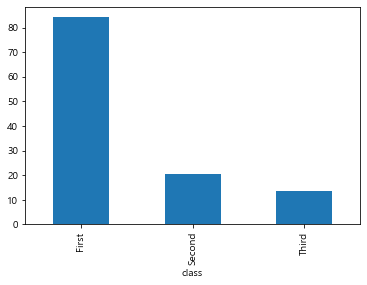

In [29]:
# 7.등급별티켓비용(fare)의 평균을 바차트로 그리시요
g = titanic.groupby('class')
g.mean()['fare'].plot(kind='bar')
plt.show()

In [ ]:
# 8.나이분류컬럼을추가하시요
# 1~15(미성년자),15~25(청년),25~35(중년),
# 35~60(장년),60~(노년)으로표시하시요.

In [33]:
ageMx =int(titanic['age'].max())

In [41]:
#0< age <=15, 15< age<=25,... 60< age<=80
titanic['나이분류']=pd.cut( titanic['age'], [0,15,25,35,60,ageMx],
      labels=['미성년자','청년','중년','장년','노년'] )

In [45]:
titanic['나이분류'].value_counts()

중년      373
청년      218
장년      195
미성년자     83
노년       22
Name: 나이분류, dtype: int64

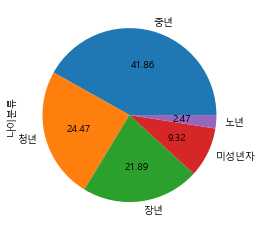

In [47]:
# 9.나이분류를파이차트로표시하시요
sr = titanic['나이분류'].value_counts()
sr.plot(kind='pie',autopct='%.2f')
plt.show()

In [49]:
g =titanic.groupby('나이분류')
g.mean()['survived']

나이분류
미성년자    0.590361
청년      0.344037
중년      0.361930
장년      0.400000
노년      0.227273
Name: survived, dtype: float64

In [53]:
# 11.성별,나이분류별,등급(pclass)를멀티인덱스로,
# 평균생존을값으로표시하시요
g = titanic.groupby(['sex','나이분류', 'pclass'])
g.mean()[['survived']]

survived
sex    나이분류 pclass          
female 미성년자 1       0.666667
            2       1.000000
            3       0.533333
       청년   1       0.960000
            2       0.947368
            3       0.485714
       중년   1       1.000000
            2       0.925926
            3       0.562500
       장년   1       0.972222
            2       0.850000
            3       0.142857
       노년   1       1.000000
            2            NaN
            3       1.000000
male   미성년자 1       1.000000
            2       1.000000
            3       0.321429
       청년   1       0.363636
            2       0.037037
            3       0.108911
       중년   1       0.404762
            2       0.119048
            3       0.141176
       장년   1       0.370370
            2       0.037037
            3       0.068182
       노년   1       0.083333
            2       0.333333
            3       0.000000

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,나이분류컬럼
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,청년
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,정년
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,중년
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,중년
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,중년
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,청년
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,중년
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,중년
